**Import Library**

In [191]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [192]:
import pandas as pd #untuk memproses data, manipulasi data, dan analisis data
import numpy as np #fungsi untuk aljabar linier dan pembuatan bilangan acak
import matplotlib.pyplot as plt #untuk visualisasi data seperti plot, histogram, bar chart, dll
%matplotlib inline
import seaborn as sns #untuk menampilkan visualisasi data lebih menarik
import warnings

#--Sklearn library-- membantu melakukan processing data ataupun melakukan training data
from sklearn.model_selection import train_test_split #membagi data secara acak
from sklearn.metrics import confusion_matrix, classification_report #untuk memplot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #untuk memplot confusion matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score #model performance
from sklearn import metrics
from sklearn.impute import KNNImputer

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Membangun model ANN
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')

**Data Understanding**

In [193]:
# Importing data
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv")

In [194]:
print(f'{df.shape[0]} rows and {df.shape[1]} columns')

5110 rows and 12 columns


In [195]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [196]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [197]:
print ("Features : \n\n", df.columns.tolist()) #mengetahui nama kolom/fitur

Features : 

 ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [198]:
print ("Missing values :\n\n", df.isnull().sum().sort_values(ascending=False)) #menghitung nilai null

Missing values :

 bmi                  201
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64


In [199]:
imputer = KNNImputer(n_neighbors=5)
df['bmi'] = imputer.fit_transform(df[['bmi']])


print ("Missing values :\n\n", df.isnull().sum().sort_values(ascending=False)) #menghitung nilai null

Missing values :

 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [200]:
print ("Unique values :  \n\n", df.nunique())  #menghitung unique values

Unique values :  

 id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64


In [201]:
num_duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows: ", num_duplicate_rows)

Number of duplicate rows:  0


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [203]:
target='stroke'
numfeat, catfeat = list(df.select_dtypes(include=np.number)), list(df.select_dtypes(exclude=np.number)); numfeat.remove(target)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [204]:
numfeat

['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [205]:
catfeat

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

**Data Analysis**

In [206]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [207]:
#korelasi dengan stroke
corr=df.corr()
corr.sort_values(by=["stroke"],ascending=False).iloc[0].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.038947
id                   0.006388
Name: stroke, dtype: float64

**Data Preparation**

In [208]:
dfmodel = df.drop(['gender','ever_married', 'work_type', 'Residence_type','smoking_status'], axis=1)
dfmodel

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.600000,1
1,51676,61.0,0,0,202.21,28.893237,1
2,31112,80.0,0,1,105.92,32.500000,1
3,60182,49.0,0,0,171.23,34.400000,1
4,1665,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0
5106,44873,81.0,0,0,125.20,40.000000,0
5107,19723,35.0,0,0,82.99,30.600000,0
5108,37544,51.0,0,0,166.29,25.600000,0


In [209]:
dfmodel.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [210]:
print(f'{dfmodel.shape[0]} rows and {dfmodel.shape[1]} columns')

5110 rows and 7 columns


In [211]:
# Make scaling data method
def scaling_check(data):

    case_count = dfmodel['stroke'].value_counts()
    print('Legend:')
    print(case_count)

    plt.figure(figsize=(10,6))
    sns.barplot(x=case_count.index, y=case_count.values)
    plt.rcParams["figure.facecolor"] = "lightblue"
    plt.title('Data Distribution', fontsize=16)
    plt.xlabel('Stroke', fontsize=12)
    plt.ylabel('Number of Stroke', fontsize=12)
    plt.xticks(range(len(case_count.index)), ['Not Stoke(0)', 'Stroke (1)'])
    plt.show()

Legend:
0    4861
1     249
Name: stroke, dtype: int64


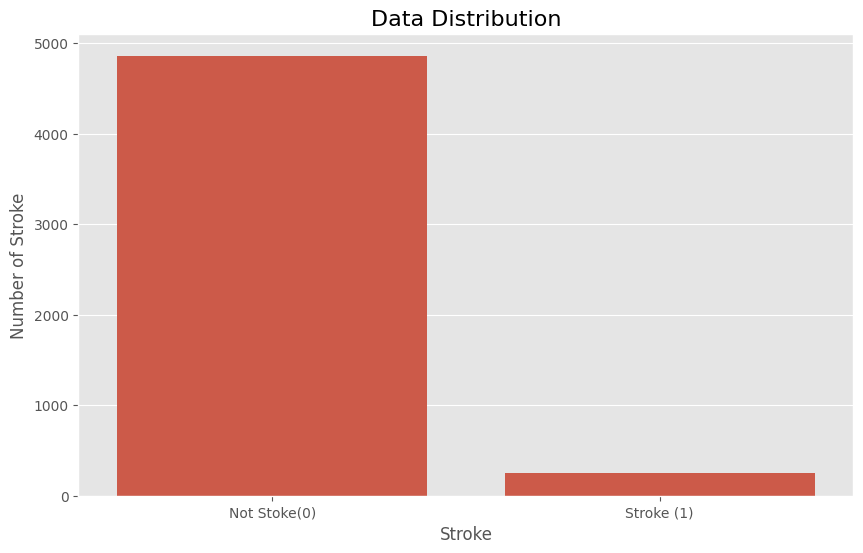

In [212]:
# Checking scaling data from Dataframe "dfmodel"
scaling_check(dfmodel)

**Building Model**

In [213]:
#menentukan variabel
X = np.array(dfmodel.drop(['stroke'], axis=1))
y = np.array(dfmodel['stroke'])

In [214]:
X.shape

(5110, 6)

In [215]:
y.shape

(5110,)

In [216]:
X_train, X_test,y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
print('X_train', X_train.shape)
print('X_test', X_test.shape)

X_train (4088, 6)
X_test (1022, 6)


**TensorFlow**

In [217]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, input_shape=(6,), activation="relu"))
model.add(tf.keras.layers.Dense(units=64, activation="relu"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['acc'])

In [218]:
history=model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)
model.summary()

Epoch 1/50
52/52 [==============================] - 1s 7ms/step - loss: 336.5609 - acc: 0.9034 - val_loss: 82.7131 - val_acc: 0.9548
Epoch 2/50
52/52 [==============================] - 0s 4ms/step - loss: 38.0544 - acc: 0.9028 - val_loss: 22.2631 - val_acc: 0.9548
Epoch 3/50
52/52 [==============================] - 0s 3ms/step - loss: 38.3348 - acc: 0.9190 - val_loss: 38.4392 - val_acc: 0.9548
Epoch 4/50
52/52 [==============================] - 0s 3ms/step - loss: 39.4389 - acc: 0.8963 - val_loss: 34.3704 - val_acc: 0.9548
Epoch 5/50
52/52 [==============================] - 0s 4ms/step - loss: 47.4835 - acc: 0.9205 - val_loss: 37.7023 - val_acc: 0.9535
Epoch 6/50
52/52 [==============================] - 0s 5ms/step - loss: 42.2559 - acc: 0.9199 - val_loss: 45.2282 - val_acc: 0.9535
Epoch 7/50
52/52 [==============================] - 0s 3ms/step - loss: 36.0036 - acc: 0.9021 - val_loss: 23.5868 - val_acc: 0.9535
Epoch 8/50
52/52 [==============================] - 0s 3ms/step - loss: 29.

In [219]:
# Evaluasi model
loss, accuracy = model.evaluate(X_train, y_train)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# list all data in history
print(history.history.keys())

128/128 [==============================] - 0s 2ms/step - loss: 2.7910 - acc: 0.9337
Loss: 2.791029453277588, Accuracy: 0.9337084293365479
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


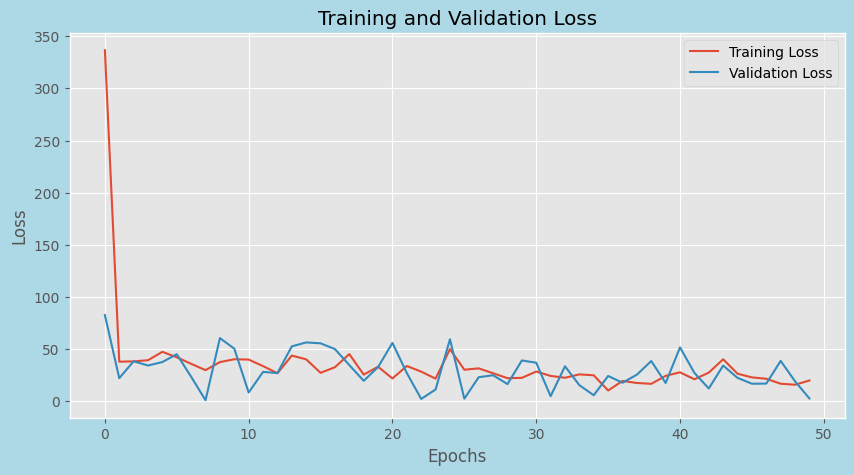

In [220]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

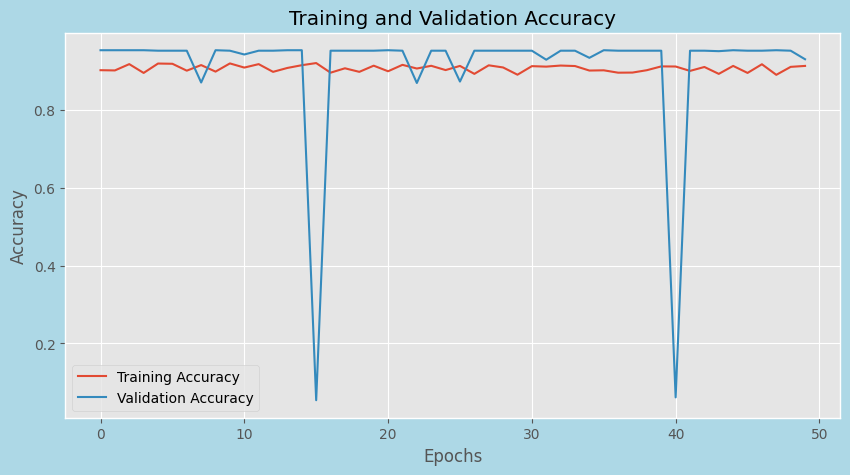

In [221]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [222]:
# make class predictions with the model
predictions = (model.predict(X_test) > 0.5)


32/32 [==============================] - 0s 1ms/step


In [223]:
predictions.shape

(1022, 1)

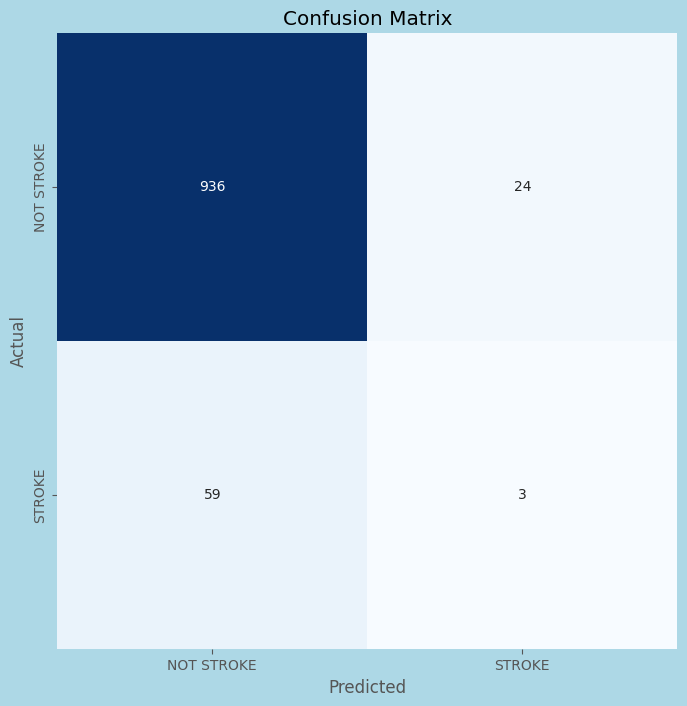

Classification Report:
----------------------
               precision    recall  f1-score   support

  NOT STROKE       0.94      0.97      0.96       960
      STROKE       0.11      0.05      0.07        62

    accuracy                           0.92      1022
   macro avg       0.53      0.51      0.51      1022
weighted avg       0.89      0.92      0.90      1022



In [224]:
cm = confusion_matrix(y_test, predictions)
clr = classification_report(y_test, predictions, target_names=["NOT STROKE", "STROKE"])

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(2) + 0.5, ["NOT STROKE", "STROKE"])
plt.yticks(np.arange(2) + 0.5, ["NOT STROKE", "STROKE"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

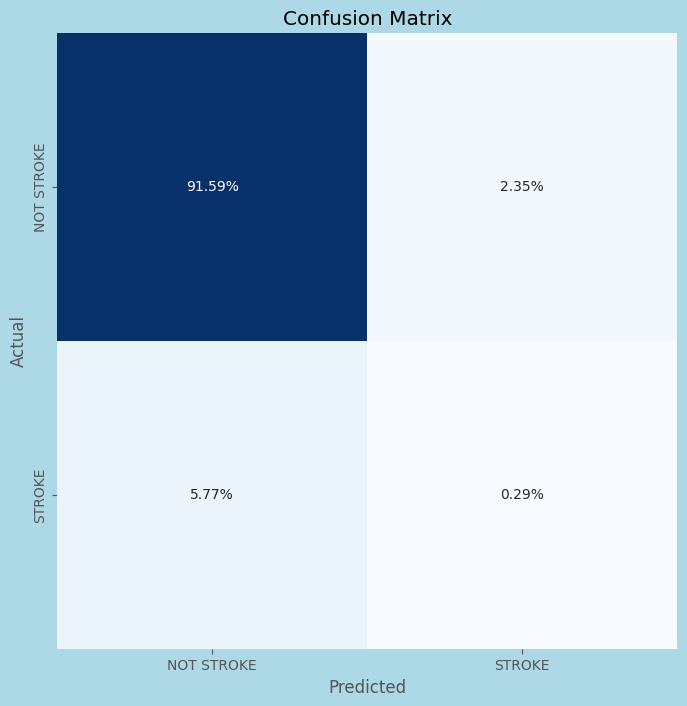

Classification Report:
----------------------
               precision    recall  f1-score   support

  NOT STROKE       0.94      0.97      0.96       960
      STROKE       0.11      0.05      0.07        62

    accuracy                           0.92      1022
   macro avg       0.53      0.51      0.51      1022
weighted avg       0.89      0.92      0.90      1022



In [225]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.xticks(np.arange(2) + 0.5, ["NOT STROKE", "STROKE"])
plt.yticks(np.arange(2) + 0.5, ["NOT STROKE", "STROKE"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

**ROC Ploting**

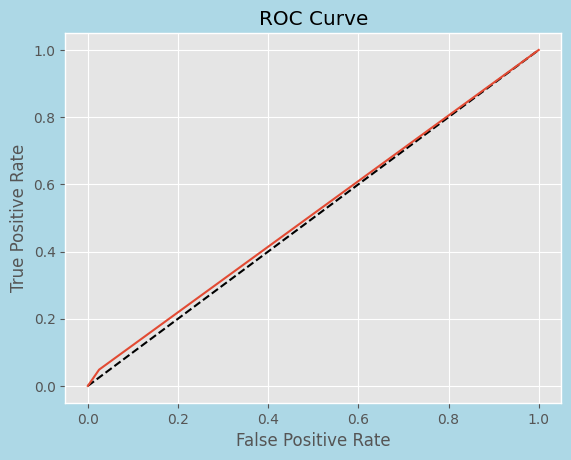

In [226]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

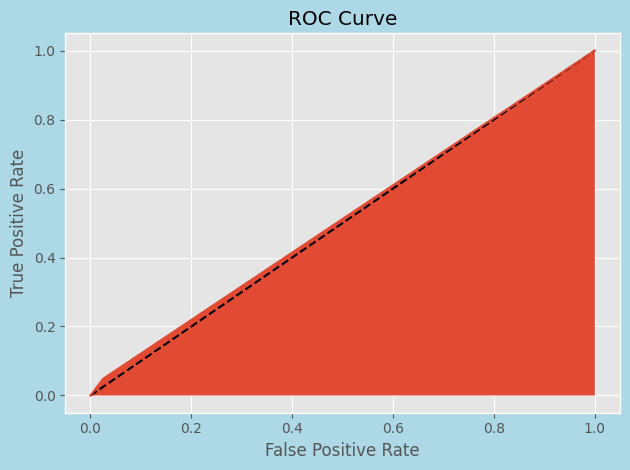

In [227]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.fill_between(fpr, tpr)
plt.tight_layout()
plt.show()

**Keras Display Model**

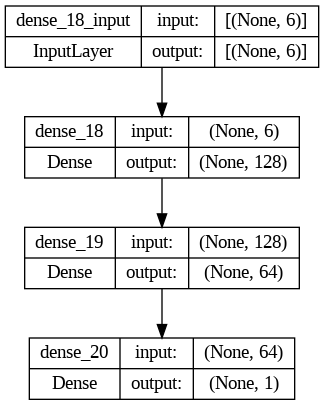

In [228]:
from IPython.display import Image
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image('model.png')